In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config IPCompleter.greedy=True

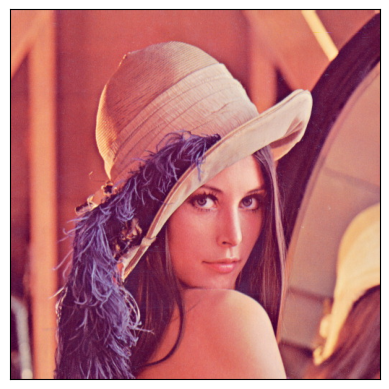

In [32]:
img = cv2.imread('/home/karen/Documents/Datasets/OpenCV/opencv/samples/data/lena.jpg', -1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow('image', img)

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show

cv2.waitKey(0)
cv2.destroyAllWindows()

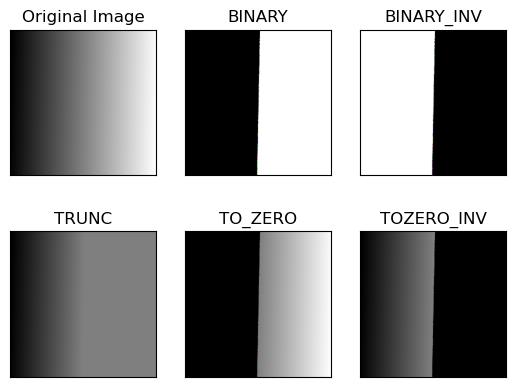

In [9]:
img = cv2.imread('/home/karen/Documents/Datasets/OpenCV/opencv/samples/data/gradient.png')
_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TO_ZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
    
# cv2.imshow('Image', img)
# cv2.imshow('th1', th1)
# cv2.imshow('th2', th2)
# cv2.imshow('th3', th3)
# cv2.imshow('th4', th4)
# cv2.imshow('th5', th5)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


### Morphological transformations
Are simple operations based on image shape and are normally performed on binary images.

In image processing, a kernel, convolutional matrix, or a mask is a small matrix. It is used for blurring, sharpening, embossing, edge detection and more.

A kernel tells you how to change the value of any given pixel by combining it with different amounts of the neighboring pixels.

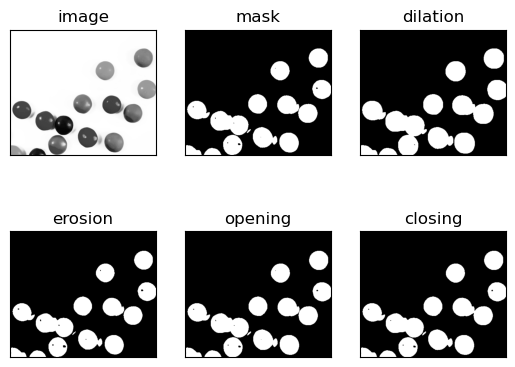

In [25]:
img = cv2.imread('/home/karen/Documents/Datasets/OpenCV/opencv/samples/data/smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((2, 2), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations=3)
erosion = cv2.erode(mask, kernel, iterations=1)
# erosion - erodes away the boundary of the foreground object
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

#morphological gradient


titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing']
images = [img, mask, dilation, erosion, opening, closing]

for i in range(len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

### Smoothing/Blurring Images

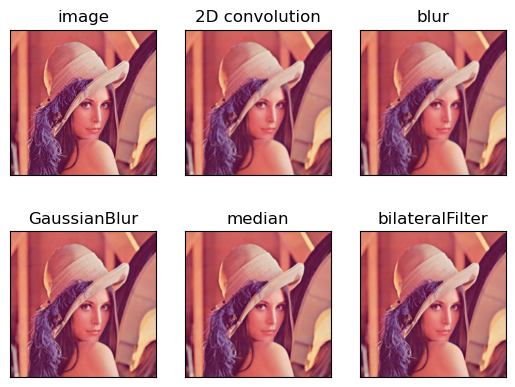

In [52]:
img = cv2.imread('/home/karen/Documents/Datasets/OpenCV/opencv/samples/data/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img, (5, 5))
# gaussian filter
gblur = cv2.GaussianBlur(img, (5, 5), 0)

# Median filter replaces each pixel value with the median of its neighbouring pixels
median = cv2.medianBlur(img, 5)

#bilateral filter
bilateral_filter = cv2.bilateralFilter(img, 9, 75, 75)


titles = ['image', '2D convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [img, dst, blur, gblur, median, bilateral_filter]

for i in range(len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()
    